In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [18]:
# create longitude and latitude combinations
lats = np.random.uniform(-90,90, size=1700)
lngs = np.random.uniform(-180,180, size=1700)
lat_lng = zip(lats , lngs)
lat_lng

In [19]:
lats

array([ 45.21341553,  73.11794966,  43.79378885, ..., -74.97121925,
        83.42599909,  43.37799008])

In [20]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lng)

In [21]:
# create a list for holding cities
cities = []

# identify the city nearest to the long and la combinations

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
     
    if city not in cities:
        cities.append(city)
        
len(cities)

643

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
city_data = []

print("Beginning Data Retrival")
print("-" * 20)

set_count = 1
record_count = 1

for i in range(len(cities)):
    # openweather free acc allows only 60 api per minute.
    # we make 50 api calls a "sleep" for a minute to be safe
    if (i%50 == 0) and (i>=50):
        set_count+= 1
        record_count = 1
        time.sleep(60) # real reason for this condition statement
        #
    city_url = url + "&q=" + cities[i].replace(" " , "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f" Processing Record {record_count} of set {set_count} | {cities[i]}")
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": cities[i].title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrival
--------------------
 Processing Record 1 of set 1 | bethel
 Processing Record 2 of set 1 | upernavik
 Processing Record 3 of set 1 | draguignan
 Processing Record 4 of set 1 | taolanaro
City not found. Skipping...
 Processing Record 5 of set 1 | kukushtan
 Processing Record 6 of set 1 | sola
 Processing Record 7 of set 1 | belyy yar
 Processing Record 8 of set 1 | millinocket
 Processing Record 9 of set 1 | tuensang
 Processing Record 10 of set 1 | mandera
 Processing Record 11 of set 1 | piranshahr
 Processing Record 12 of set 1 | estelle
 Processing Record 13 of set 1 | marsa matruh
 Processing Record 14 of set 1 | busselton
 Processing Record 15 of set 1 | atuona
 Processing Record 16 of set 1 | airai
 Processing Record 17 of set 1 | hihifo
City not found. Skipping...
 Processing Record 18 of set 1 | kashi
 Processing Record 19 of set 1 | lebu
 Processing Record 20 of set 1 | port elizabeth
 Processing Record 21 of set 1 | mullaitivu
City not found. Skipping

 Processing Record 34 of set 4 | barentsburg
City not found. Skipping...
 Processing Record 35 of set 4 | bac giang
 Processing Record 36 of set 4 | maumere
 Processing Record 37 of set 4 | port blair
 Processing Record 38 of set 4 | athabasca
 Processing Record 39 of set 4 | port macquarie
 Processing Record 40 of set 4 | bambanglipuro
 Processing Record 41 of set 4 | riberalta
 Processing Record 42 of set 4 | birjand
 Processing Record 43 of set 4 | ucluelet
 Processing Record 44 of set 4 | eatonton
 Processing Record 45 of set 4 | pryozerne
 Processing Record 46 of set 4 | cape town
 Processing Record 47 of set 4 | palasa
 Processing Record 48 of set 4 | statesboro
 Processing Record 49 of set 4 | codrington
 Processing Record 50 of set 4 | waipawa
 Processing Record 1 of set 5 | alice springs
 Processing Record 2 of set 5 | aksu
 Processing Record 3 of set 5 | college
 Processing Record 4 of set 5 | road town
 Processing Record 5 of set 5 | byron bay
 Processing Record 6 of set 5 |

 Processing Record 18 of set 8 | shenjiamen
 Processing Record 19 of set 8 | ingraj bazar
 Processing Record 20 of set 8 | chengde
 Processing Record 21 of set 8 | aporawan
City not found. Skipping...
 Processing Record 22 of set 8 | katsuura
 Processing Record 23 of set 8 | jujuy
City not found. Skipping...
 Processing Record 24 of set 8 | gravdal
 Processing Record 25 of set 8 | magadi
 Processing Record 26 of set 8 | matara
 Processing Record 27 of set 8 | limoeiro
 Processing Record 28 of set 8 | nguiu
City not found. Skipping...
 Processing Record 29 of set 8 | tshikapa
 Processing Record 30 of set 8 | pacific grove
 Processing Record 31 of set 8 | baie-saint-paul
 Processing Record 32 of set 8 | manta
 Processing Record 33 of set 8 | nelson bay
 Processing Record 34 of set 8 | korla
 Processing Record 35 of set 8 | baden
 Processing Record 36 of set 8 | isangel
 Processing Record 37 of set 8 | tsihombe
City not found. Skipping...
 Processing Record 38 of set 8 | lavrentiya
 Proce

 Processing Record 50 of set 11 | bafq
 Processing Record 1 of set 12 | concepcion
 Processing Record 2 of set 12 | svetlyy
 Processing Record 3 of set 12 | udachnyy
 Processing Record 4 of set 12 | mount isa
 Processing Record 5 of set 12 | tura
 Processing Record 6 of set 12 | abeche
 Processing Record 7 of set 12 | bargur
 Processing Record 8 of set 12 | sao miguel do araguaia
 Processing Record 9 of set 12 | roma
 Processing Record 10 of set 12 | gazli
 Processing Record 11 of set 12 | maceio
 Processing Record 12 of set 12 | yulara
 Processing Record 13 of set 12 | bilibino
 Processing Record 14 of set 12 | wahran
City not found. Skipping...
 Processing Record 15 of set 12 | zyryanka
 Processing Record 16 of set 12 | touros
 Processing Record 17 of set 12 | kabalo
 Processing Record 18 of set 12 | dustlik
 Processing Record 19 of set 12 | peniche
 Processing Record 20 of set 12 | sao joao da barra
 Processing Record 21 of set 12 | amaraji
 Processing Record 22 of set 12 | hokitika

In [27]:
len(city_data) 

590

In [28]:
# create a panda dataframe  for city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,70.11,94,0,0.00,US,2022-08-02 03:19:00
1,Upernavik,72.7868,-56.1549,44.76,73,100,3.65,GL,2022-08-02 03:19:00
2,Draguignan,43.5333,6.4667,71.01,75,21,2.30,FR,2022-08-02 03:19:01
3,Kukushtan,57.6464,56.4952,60.42,72,35,5.73,RU,2022-08-02 03:19:01
4,Sola,-13.8833,167.5500,80.71,78,15,16.42,VU,2022-08-02 03:19:02


In [30]:
column_order = ["City", "Country","Date","Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-08-02 03:19:00,41.3712,-73.4140,70.11,94,0,0.00
1,Upernavik,GL,2022-08-02 03:19:00,72.7868,-56.1549,44.76,73,100,3.65
2,Draguignan,FR,2022-08-02 03:19:01,43.5333,6.4667,71.01,75,21,2.30
3,Kukushtan,RU,2022-08-02 03:19:01,57.6464,56.4952,60.42,72,35,5.73
4,Sola,VU,2022-08-02 03:19:02,-13.8833,167.5500,80.71,78,15,16.42


In [31]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# export the dataframe into a csv file
city_data_df.to_csv(output_data_file , index_label = "City ID")


In [35]:
df_lat = city_data_df['Lat']
df_max_temp = city_data_df["Max Temp"]

In [41]:
dir(time)

['_STRUCT_TM_ITEMS',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'altzone',
 'asctime',
 'clock',
 'ctime',
 'daylight',
 'get_clock_info',
 'gmtime',
 'localtime',
 'mktime',
 'monotonic',
 'monotonic_ns',
 'perf_counter',
 'perf_counter_ns',
 'process_time',
 'process_time_ns',
 'sleep',
 'strftime',
 'strptime',
 'struct_time',
 'thread_time',
 'thread_time_ns',
 'time',
 'time_ns',
 'timezone',
 'tzname']

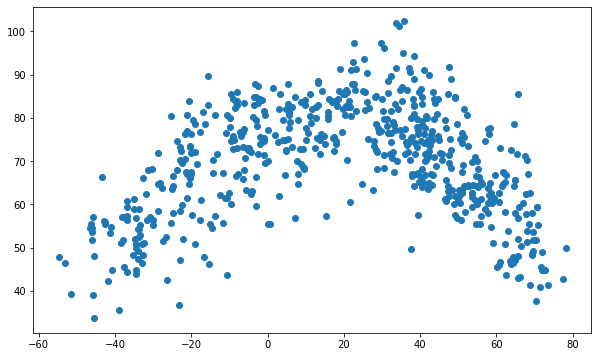

In [39]:
plt.subplots(figsize=(10,6))
plt.scatter(df_lat, df_max_temp )
plt.xlabel(" Latitudes")
plt.ylabel("Temperature")
plt.
plt.show()